<a href="https://colab.research.google.com/github/glauciodrumond/Data_Analysis/blob/master/Analisando_Crime_em_Minas_Gerais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISANDO CRIMES EM MINAS GERAIS** 
![Image of MAP Minas Gerais](https://gazetadebebedouro.com.br/wp-content/uploads/Crimes-crescem-5-em-julho-mas-recuam-10-no-ano-aponta-SSP.jpg)




Minas Gerais é o quarto maior estado do Brasil e o maior da região sudeste do Brasil, com 586.521,121 km², que conta ainda com os estados de São Paulo, Rio de Janeiro e Espírito Santo.

Possui uma população estimada em 21 milhões de pessoas, sendo o segundo estado mais populoso do Brasil, distribuídas em 853 municípios, que correspondem a 15% do total de municípios do país, sendo o estado brasileiro com o maior número de municípios.

O estado de Minas Gerais se destaca pelas belezas naturais como cachoeiras, lagoas, grutas, montanhas, entre outras e também pela sua rica história com destaque para as minas, como o proprio nome do estado diz, marcada pela época do descobrimento do ouro e pedras preciosas no território brasileiro por meio do trabalho dos bandeirantes.

Em 2001 foi formulado a Estrada Real, um circuito turístico que passa por caminhos onde foram transportados os ouros das minas, sendo a maior rota turística do país. A rota possui mais de 1.630 quilômetros de extensão e passa por Minas Gerais, Rio de Janeiro e São Paulo. Hoje, ela resgata as tradições do percurso valorizando a identidade e as belezas da região.

<center><img alt="Analisando Airbnb" width="50%" src="https://www.estudopratico.com.br/wp-content/uploads/2018/11/mapa-cidades-minas.jpg"></center>





In [0]:
# importando os pacotes que serao usados neste notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() 


# **OBTENÇÃO DOS DADOS**
Em Minas Gerais o serviço de segurança pública é composta pela Polícia Militar, Corpo de  Bombeiros Militar, Polícia Civil e Sistema Prisional. Por meio do  SIDS (Sistema Integrado  de Defesa Social), que é um sistema de gestão das informações, estes órgãos conseguem  gerir ocorrências de Defesa Social relacionada às ocorrências policiais e de bombeiros, à  investigação policial, ao processo judicial e à execução penal, respeitadas as atribuições legais dos órgãos que o compõem.

Os dados foram obtidos diretamente do portal da segurança pública de Minas Gerais que  podem ser baixados clicando [neste link](http://www.seguranca.mg.gov.br/2018-08-22-13-39-06/dados-abertos)

Os arquivos `.csv` utilizados neste notebook foram preprocessados e contem dados de criminalidade dos 853 municípios de Minas Gerais.


## **CARREGANDO OS DADOS**

Inicialmente foram carregados 7 arquivos .csv que serao inicialmente  analisados e pre processados.

In [3]:
# carregando data frames retirados do site http://www.seguranca.mg.gov.br/2018-08-22-13-39-06/dados-abertos
df_crimesviolentos1 = pd.read_csv (r"http://www.seguranca.mg.gov.br/images/2020/Marco/Banco%20Crimes%20Violentos%20Armazm%20-%20Atualizado%202012%20a%202017.csv", sep=';', encoding='latin-1')
df_crimesviolentos2 = pd.read_csv (r"http://www.seguranca.mg.gov.br/images/2020/Marco/Banco%20Crimes%20Violentos%20Armazm%20-%20Atualizado%20Janeiro%202020.csv" , sep=';', encoding='latin-1')
df_crimesviolentoshomicidioconsumado = pd.read_csv (r"http://www.seguranca.mg.gov.br/images/2020/Marco/Banco%20Vtimas%20de%20Homicdio%20Consumado%20%20-%20Atualizado%20Janeiro%202020.csv", sep=';', encoding='latin-1')
df_roubosalvos = pd.read_csv (r"http://www.seguranca.mg.gov.br/images/2020/Marco/Banco%20Alvos%20de%20Roubo%20-%20Atualizado%20Janeiro%202020.csv", sep=';', encoding='latin-1')
df_furtosalvos = pd.read_csv (r"http://www.seguranca.mg.gov.br/images/2020/Marco/Banco%20Alvos%20de%20Furto%20-%20Atualizado%20Janeiro%202020.csv", sep=';', encoding='latin-1')
df_veiculosroubados = pd.read_csv (r"http://www.seguranca.mg.gov.br/images/2020/Marco/Banco%20Veculos%20Roubados%20-%20Atualizado%20Janeiro%202020.csv", sep=';', encoding='latin-1')
df_veiculosfurtados = pd.read_csv (r"http://www.seguranca.mg.gov.br/images/2020/Marco/Banco%20Veculos%20Furtados%20-%20Atualizado%20Janeiro%202020.csv", sep=';', encoding='latin-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **TRATAMENTO DOS DADOS**

Após uma visualização dos datasets notou-se alguns detalhes e foram realizadas as seguintes ações: 

* Algumas colunas de datasets semelhantes possuíam nomes diferentes,  por isso  foram  modificadas para realizar a concatenação, 

* Havia datasets que possuíam as mesmas características e foram concatenados,  

* Os datasets possuíam várias linhas vazias, sem valores que foram removidas, 

* Após a concatenação os index foram resetados, 

* Os tipos de dados que as colunas tinham foram corrigidos


In [0]:
# Eliminando todas as linhas que apresetam valores vazios
df_crimesviolentos1 = df_crimesviolentos1.dropna(how = 'all')
df_crimesviolentos2 = df_crimesviolentos2.dropna(how = 'all')
df_crimesviolentoshomicidioconsumado = df_crimesviolentoshomicidioconsumado.dropna(how = 'all')
df_roubosalvos = df_roubosalvos.dropna(how = 'all')
df_furtosalvos = df_furtosalvos.dropna(how = 'all')
df_veiculosroubados = df_veiculosroubados.dropna(how = 'all')
df_veiculosfurtados = df_veiculosfurtados.dropna(how = 'all')

In [0]:
# Renomeando as colunas de crimes violentos para que nao ocorra erro ba concatenacao
df_crimesviolentos1 =df_crimesviolentos1.rename(columns={'Cod IBGE' : 'Cod. IBGE'})
df_crimesviolentos2 = df_crimesviolentos2.rename(columns={'Cod IBGE' : 'Cod. IBGE'})

In [0]:
# Concatenacao dos data frames semelhantes
frames1 = [df_roubosalvos , df_furtosalvos , df_veiculosroubados , df_veiculosfurtados]
frames2 = [df_crimesviolentos1 , df_crimesviolentos2 ]
df1 = pd.concat(frames1)
df2 = pd.concat(frames2)
df3 = df_crimesviolentoshomicidioconsumado

In [0]:
# Renomeacao das colunas para padronizacao
df1 = df1.rename(columns = {'Município' : 'Municipio' , 'Mês ' : 'Mes'})
df2 = df2.rename(columns = {'Município' : 'Municipio' , 'Mês ' : 'Mes'})
df3 = df3.rename(columns = {'Município' : 'Municipio' , 'Mês ' : 'Mes' , 'Vítimas' : 'Vitimas'})

In [0]:
# Modificacao do type das colunas para o type correto
df1 = df1.astype (({ "Ano": int , "RISP": int , "Cod. IBGE": int,   "Mes" : int , "Registros" : int}))
df2 = df2.astype (({ "Ano": int , "RISP": int , "Cod. IBGE": int,   "Mes" : int , "Registros" : int}))
df3 = df3.astype (({ "Ano": int , "RISP": int , "Cod. IBGE": int,   "Mes" : int , "Vitimas" : int}))

In [0]:
# Resetando o index apos concatenacao
df1=df1.reset_index()

In [0]:
# Removendo a coluna antiga do index
df1 = df1.drop(['index'], axis=1)

In [0]:
# Resetando o index apos concatenacao
df2 = df2.reset_index()

In [0]:
# Removendo a coluna antiga do index
df2 = df2.drop(['index'], axis=1)

*No final ficamos com 3 datasets que foram nomeados com df1, df2 e df3*

# **EXPLORANDO OS DATASETS**

##**PRIMEIRO DATASET**

Neste primeiro dataset os dados que foram analisados são referentes aos crimes de natureza roubo e furto com diversos alvos. O roubo e configurado segundo Código Penal Brasileiro em seu Art. 157,

**Art. 157-** Subtrair coisa móvel alheia, para si ou para outrem, mediante grave ameaça ou violência a pessoa, ou depois de havê-la, por qualquer meio, reduzido à impossibilidade de resistência.

já o furto e configurado conforme Art. 155 do mesmo codigo:

**Art. 155 -** Subtrair, para si ou para outrem, coisa alheia móvel

Portanto o roubo possui penas mais severas do que o furto já que para que se configure o ato e necessario, além da subtração do bem, a grave ameaça ou violência a pessoa, ou por qualquer meio reduzir a capacidade de resistencia da vitima.

Vamos ver as entradas iniciais, como é distribuído nosso dataset e extrair algumas informações importante. 

Os dados foram coletados  de janeiro de 2015 a janeiro de 2020.

In [13]:
# monstrando as primeiras entradas do dataset
df1.head()

,Registros,Natureza,Alvos,Municipio,Cod. IBGE,Mes,Ano,RISP,RMBH
0,0,Roubo,Cargas,ABADIA DOS DOURADOS,310010,1,2015,10,NÃO
1,0,Roubo,Cargas,ABAETE,310020,1,2015,7,NÃO
2,0,Roubo,Cargas,ABRE-CAMPO,310030,1,2015,12,NÃO
3,0,Roubo,Cargas,ACAIACA,310040,1,2015,12,NÃO
4,0,Roubo,Cargas,ACUCENA,310050,1,2015,12,NÃO


Observamos que nosso dataset possui 624396 entradas(linhas) distribuídas em 9 colunas 

In [14]:
# Formato do nosso dataframe
df1.shape

(624396, 9)

Nosso dataset possui somente 2 tipos de natureza que são roubo e furto, essas naturezas possuem 6 alvos diferentes que sao: **cargas, estabelecimento comercial, residência, transeunte, transporte coletivo, veículos.**

In [15]:
# tipos de natureza
df1.Natureza.unique()

array(['Roubo', 'Furto'], dtype=object)

In [16]:
# tipos de alvos
df1.Alvos.unique()

array(['Cargas', 'Estabelecimento Comercial', 'Residência', 'Transeunte',
       'Transporte Coletivo', 'Veículos'], dtype=object)

Aqui podemos ver que o maior registro de ocorrência foi 2.782 de um total de 1.567.028 , encontramos o índex desse registro e mostrado todas informações desta entrada.

In [17]:
# valores max e total da coluna registro
max_registros = df1.Registros.max()
total_registros = df1.Registros.sum()

# vai mostrar em qual index esta o max value do registro
index_max_registros = df1.Registros.idxmax()

# imprimir o valor máximo e total de registros
print("Max:\t{}".format(max_registros))
print("Total:\t{}".format(total_registros))
print("Index:\t{}".format(index_max_registros))

Max:	2782
Total:	1567028
Index:	420594


In [18]:
# Mostra todas as informações da entrada com baseada no índex 
# que e referente ao nosso valor máximo do registro 
df1.loc[[420594]]

,Registros,Natureza,Alvos,Municipio,Cod. IBGE,Mes,Ano,RISP,RMBH
420594,2782,Furto,Transeunte,BELO HORIZONTE,310620,2,2018,1,NÃO


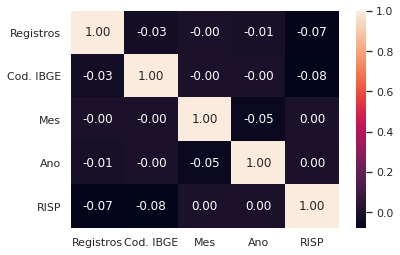

In [22]:
# Aqui mostramos a matriz de correlação  entre um par de variáveis numéricas 

sns.heatmap(df1.corr(), annot=True, fmt=".2f")
plt.show()

###DATASET 1 - PRIMEIRO GRÁFICO 

Nosso primeiro gráfico gerado mostra a distribuição das ocorrências por grupos de natureza, roubo e furto, com diversos alvos.

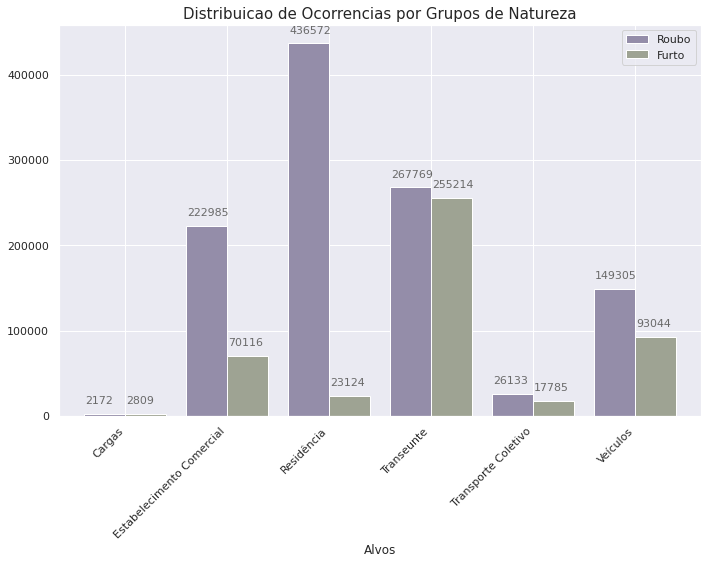

In [18]:
# Escolhendo as cores que serão usadas no grafico
color = ['#948da9','#9ea393']
# Gerando o gráfico usando nosso dataframe
ax = df1.groupby(["Alvos" , "Natureza"])["Registros"].sum().unstack().plot(kind='bar',
                                                                      figsize = (10,8),
                                                                      width = 0.8, color=color )
ax.set_alpha(0.8)
ax.set_title("Distribuicao de Ocorrencias por Grupos de Natureza", fontsize = 15);
plt.xticks(rotation=45, ha="right")
plt.legend(['Roubo', 'Furto'], loc='upper right')
# set individual valores da barra 
for i in ax.patches:
    # get_x puxa p/ esquerda ou direita; get_height manda pra cima ou baixo
    ax.text(i.get_x()+.01, i.get_height()+12000, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',
                rotation=0)
plt.tight_layout();

Após visualização do gráfico concluiu-se:

Exceto quando o alvo é cargas, o número de ocorrências de roubo supera o furto.

Roubo em residência são as ocorrências que possuem maior número registros.

Tanto o roubo quanto o furto a cargas são as ocorrências com menor numero de  registros.

O transeunte (pessoa que está de passagem, que não permanece por muito tempo no mesmo lugar) e o alvo com maior número de ocorrências, somando-se  as  naturezas,  com  522.983 registros.

### DATASET 1 - SEGUNDO GRAFICO

No segundo gráfico gerado, temos o percentual  de registros que cada RISP (Região Integrada de Segurança Pública) e responsável por atender.

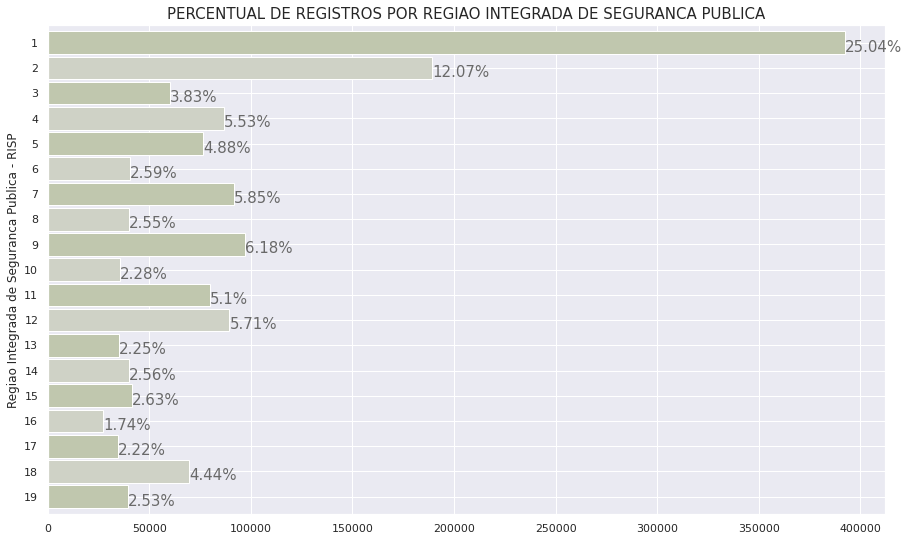

In [19]:
color = ['#c0c7ae','#cfd2c6']
ax = df1.groupby(["RISP"])["Registros"].sum().plot( kind = 'barh', figsize=(15,9), width= 0.9,fontsize=11,color = color);
plt.ylabel("Regiao Integrada de Seguranca Publica - RISP")
plt.title("PERCENTUAL DE REGISTROS POR REGIAO INTEGRADA DE SEGURANCA PUBLICA", FONTSIZE = 15);
# cria uma lista para coletar o plt.patches data
totals = []
# procurar os valores e adicionar a lista
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
# seta individual valores da barra usando valores da lista acima
for i in ax.patches:
    # get_x puxa p/ esquerda ou direita; get_height manda pra cima ou baixo
    ax.text(i.get_width()+.3, i.get_y()+.80, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')
# inverte o eixo y
ax.invert_yaxis()

Analisando o segundo gráfico percebe-se que a Primeira RISP e responsável pelo registro de 25% (vinte e cinco por cento) do registro de todas as ocorrencias.

Essa RISP e composta somente pelo município de Belo Horizonte que além de ser a capital do estado, possui cerca de 2,5 milhões de habitantes sendo portando o município de maior população, configurando assim uma justificativa para o elevado número de ocorrências.

A segunda RISP, que e composta por municípios da região metropolitana de Belo Horizonte (RMBH), também merece destaque ficando com aproximadamente 12% (doze por cento) dos registros das ocorrencias.

### DATASET 1 - TERCEIRO GRAFICO 

Este gráfico mostra a evolução das ocorrências, por mês, ao longo dos anos da quantidade de ocorrências registradas. 

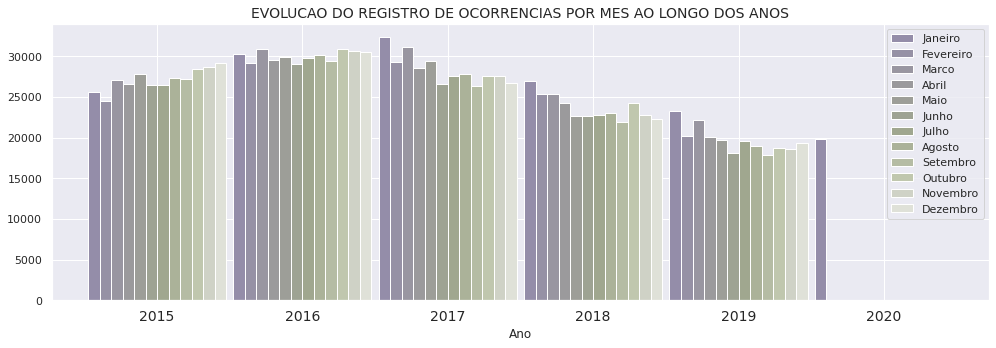

In [20]:
color = ['#948da9','#9691a5','#9996a1','#9b9a9c','#9d9e98','#9ea393',
         '#a0a78f','#abb299','#b5bca4','#c0c7ae','#cfd2c6','#dfe1d8']

ax = df1.groupby([ "Ano","Mes" ])["Registros"].sum().unstack().plot(kind='bar', figsize = (14,5), width = 0.95, color = color)

plt.legend(['Janeiro', 'Fevereiro','Marco','Abril','Maio','Junho','Julho', 
            'Agosto','Setembro','Outubro','Novembro','Dezembro'], loc='upper right')
plt.xticks(rotation=0, ha="center" , fontsize = 14)
plt.title("EVOLUCAO DO REGISTRO DE OCORRENCIAS POR MES AO LONGO DOS ANOS", fontsize =14);

plt.tight_layout();

**Abaixo podemos visualizar o total de registro de ocorrencias por ano para confirmar  a tendencia de queda no numero de registro de ocorrencias no estado de Minas Gerais apos o ano de 2016.**

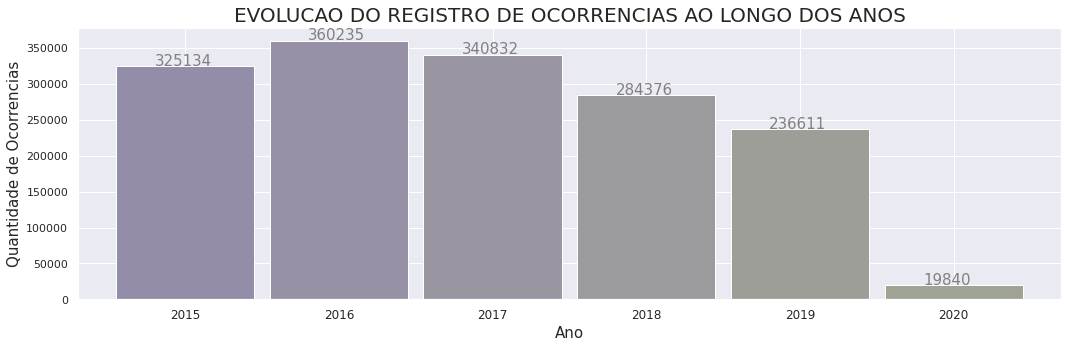

In [21]:
color = ['#948da9','#9691a5','#9996a1','#9b9a9c','#9d9e98','#9ea393']

ax = df1.groupby(["Ano"])["Registros"].sum().plot(kind='bar', figsize = (15,5),width = 0.9, color = color )

ax.set_alpha(0.8)

# set individual valores da barra 
for i in ax.patches:
    # get_x puxa p/ esquerda ou direita; get_height manda pra cima ou baixo
    ax.text(i.get_x()+.250, i.get_height()+1000, \
            str(round((i.get_height()), 2)), fontsize=15, color='grey',
                rotation=0)

plt.xticks(rotation=0, ha="center" , fontsize = 12)
plt.ylabel("Quantidade de Ocorrencias", fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
plt.title("EVOLUCAO DO REGISTRO DE OCORRENCIAS AO LONGO DOS ANOS", fontsize = 20);
plt.tight_layout();

Nestes gráficos nota-se um  aumento  no  registro  de  ocorrências  nos  anos  de  2015  e  2016, chegando ao pico em janeiro de 2017.  Após  esse  período,  o  estado  de  Minas  Gerais vem em uma tendência de baixa no registro de ocorrências.

Um dos fatores que pode ter contribuido para essa queda foram as contratações  realizadas  pelo  estado,  via  concurso  publico,  para a área  de segurança pública  onde principalmente na  polícia militar ocorreram diversos  concursos nos anos  de 2016 e 2017.

## SEGUNDO DATASET
Neste segundo dataset os dados que serão analisados são referentes a dados de treze diferentes crimes considerados violentos como: estupro consumado, extorsão mediante sequestro consumado, sequestro e cárcere privado tentado e outros.

Vamos ver as entradas iniciais, como é distribuído nosso dataset e extrair algumas informações importante. 

Os dados foram coletados  de janeiro de 2012 a janeiro de 2020



In [22]:
# Algumas entradas do dataset
df2.head(3)

,Registros,Natureza,Municipio,Cod. IBGE,Mes,Ano,RISP,RMBH
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2012,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2012,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2012,12,NÃO


In [23]:
# Quantidade de entradas por colunas
df2.shape

(1075633, 8)

In [24]:
# Tipos de classificação das naturezas
df2.Natureza.unique()

array(['Estupro Consumado', 'Estupro de Vulnerável Consumado',
       'Estupro de Vulnerável Tentado', 'Estupro Tentado',
       'Extorsão Mediante Sequestro Consumado', 'Homicídio Tentado',
       'Roubo Consumado', 'Sequestro e Cárcere Privado Consumado',
       'Extorsão Consumado', 'Roubo Tentado',
       'Homicídio Consumado (Registros)', 'Extorsão Tentado',
       'Sequestro e Cárcere Privado Tentado'], dtype=object)

Acima vimos como o dataset esta distribuído, o seu formato e classificação das naturezas.

In [25]:
# valores max e total da coluna registro
max2_registros = df2.Registros.max()
total2_registros = df2.Registros.sum()

# vai mostrar em qual index esta o max value do registro
index2_max_registros = df2.Registros.idxmax()

# imprimir o valor máximo e total de registros
print("Max:\t{}".format(max2_registros))
print("Total:\t{}".format(total2_registros))
print("Index:\t{}".format(index2_max_registros))

# Mostra todas as informações da entrada com baseada no índex 
# que e referente ao nosso valor máximo do registro 
df2.loc[[182607]]

Max:	4303
Total:	903084
Index:	182607


,Registros,Natureza,Municipio,Cod. IBGE,Mes,Ano,RISP,RMBH
182607,4303,Roubo Consumado,BELO HORIZONTE,310620,3,2016,1,NÃO


Agora encontramos a linha com maior número de registros e mostramos todas as suas informações.

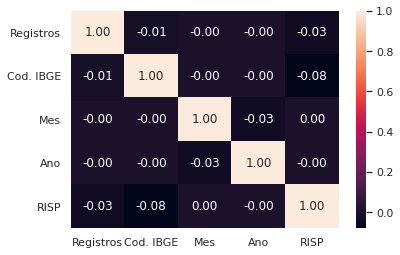

In [24]:
# Aqui mostramos a matriz de correlação  entre um par de variáveis numéricas 

sns.heatmap(df2.corr(), annot=True, fmt=".2f")
plt.show()

### DATASET 2 - PRIMEIRO GRÁFICO 

Nosso primeiro gráfico, do segundo dataframe, gerado mostra a distribuição das ocorrências por grupos de natureza

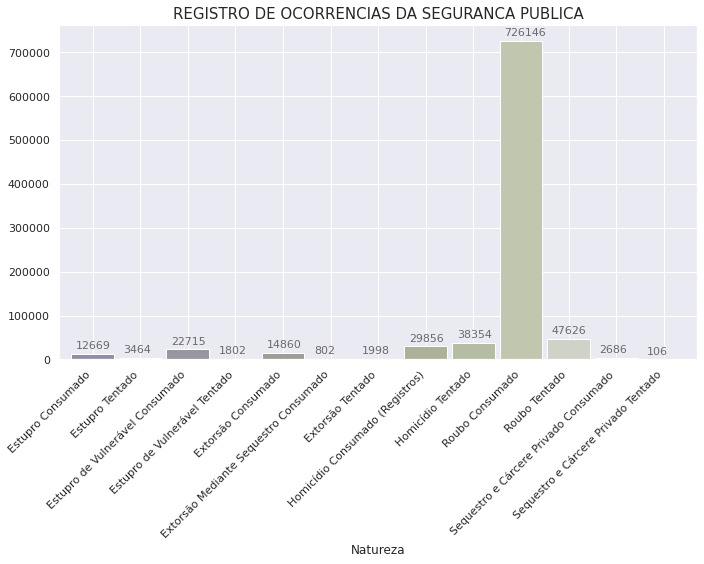

In [26]:
# Gerando grafico 
color = ['#948da9','#9691a5','#9996a1','#9b9a9c','#9d9e98','#9ea393',
         '#a0a78f','#abb299','#b5bca4','#c0c7ae','#cfd2c6','#dfe1d8']

ax = df2.groupby(["Natureza"])["Registros"].sum().plot(kind='bar',figsize = (10,8),width = 0.9, color = color )

ax.set_alpha(0.8)
ax.set_title("REGISTRO DE OCORRENCIAS DA SEGURANCA PUBLICA", fontsize = 15);
plt.xticks(rotation=45, ha="right")

# set individual valores da barra 
for i in ax.patches:
    # get_x puxa p/ esquerda ou direita; get_height manda pra cima ou baixo
    ax.text(i.get_x()+.10, i.get_height()+12000, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',
                rotation=0)

plt.tight_layout();

Podemos notar que o maior numero de registro de ocorrências foi para a natureza  de roubo consumado, com mais de 726 mil ocorrências, seguido por roubo tentado  com mais de 47 mil ocorrências. 

Os menores registros ficam com a natureza sequestro e cárcere privado tentado, com 106 ocorrencias, seguido por extorsão mediante sequestro consumado com 802 ocorrencias registradas.

### **DATASET 2 - SEGUNDO GRAFICO**
Em nossa segunda análise, que vai nos mostrar a evolução mês a mês ao longo dos anos da quantidade de ocorrências registradas, nota-se um aumento no registro de ocorrencias de 2012 a 2016 chegando ao pico em janeiro de 2017, assim como ocorreu com nosso primeiro dataset.



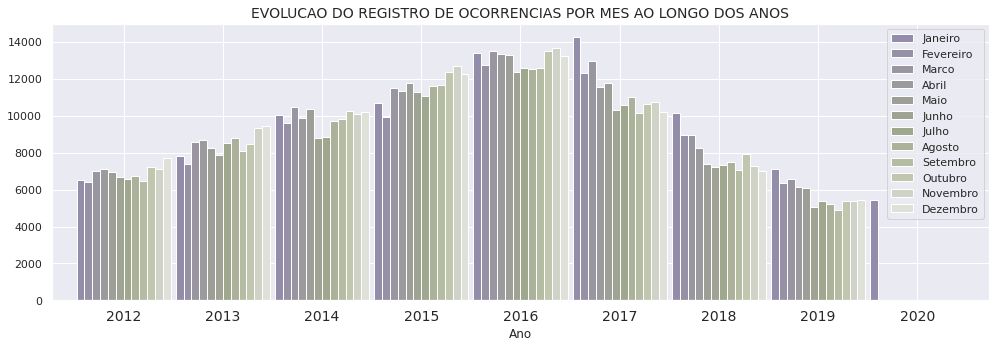

In [27]:
color = ['#948da9','#9691a5','#9996a1','#9b9a9c','#9d9e98','#9ea393',
         '#a0a78f','#abb299','#b5bca4','#c0c7ae','#cfd2c6','#dfe1d8']

ax = df2.groupby([ "Ano","Mes" ])["Registros"].sum().unstack().plot(kind='bar', figsize = (14,5), width = 0.95, color = color)


plt.legend(['Janeiro', 'Fevereiro','Marco','Abril','Maio','Junho','Julho', 
            'Agosto','Setembro','Outubro','Novembro','Dezembro'], loc='upper right')

plt.xticks(rotation=0, ha="center" , fontsize = 14)

plt.title("EVOLUCAO DO REGISTRO DE OCORRENCIAS POR MES AO LONGO DOS ANOS", fontsize =14);


plt.tight_layout();

Abaixo podemos visualizar o total de registro de ocorrencias por ano para confirmar o aumento das ocorrências de 2012 a 2016 e a tendência de queda no numero de registro de ocorrências no estado de Minas Gerais após o ano de 2016.

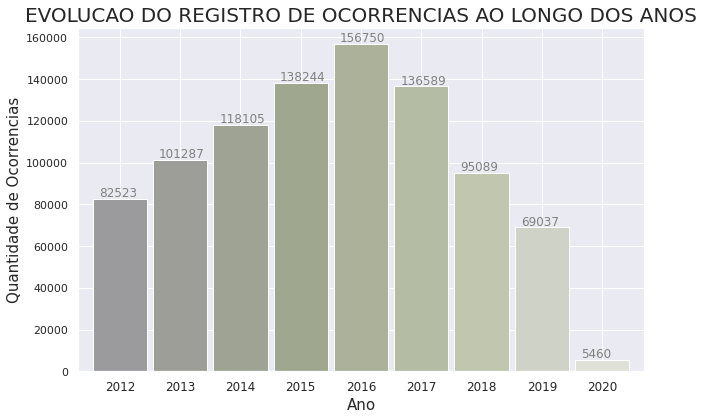

In [28]:
#Gerando grafico
color = ['#9b9a9c','#9d9e98','#9ea393','#a0a78f','#abb299','#b5bca4','#c0c7ae','#cfd2c6','#dfe1d8']

ax = df2.groupby(["Ano"])["Registros"].sum().plot(kind='bar', figsize = (10,6),width = 0.9,color = color )
ax.set_alpha(0.8)

# set individual valores da barra 
for i in ax.patches:
    # get_x puxa p/ esquerda ou direita; get_height manda pra cima ou baixo
    ax.text(i.get_x()+.100, i.get_height()+1000, \
            str(round((i.get_height()), 2)), fontsize=12, color='grey',
                rotation=0)

plt.xticks(rotation=0, ha="center" , fontsize = 12)
plt.ylabel("Quantidade de Ocorrencias", fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
plt.title("EVOLUCAO DO REGISTRO DE OCORRENCIAS AO LONGO DOS ANOS", fontsize = 20);
plt.tight_layout();

### **DATASET 2 - TERCEIRO GRAFICO**


No segundo gráfico gerado, temos o percentual  de registros que cada RISP (Região Integrada de Segurança Pública) e responsável por atender.

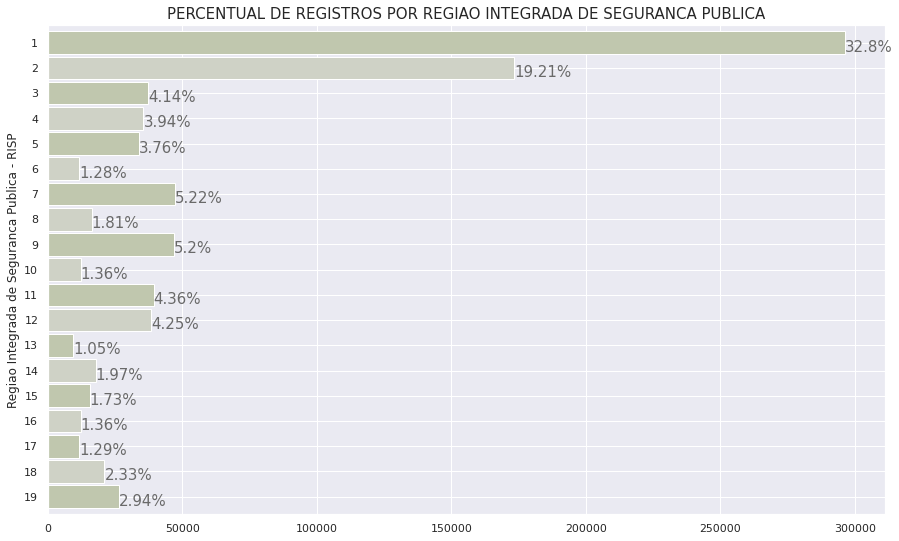

In [29]:
# Somatorio de registros por RISP

color = ['#c0c7ae','#cfd2c6']
ax = df2.groupby(["RISP"])["Registros"].sum().plot( kind = 'barh', figsize=(15,9), width= 0.9,fontsize=11,color = color);
#plt.xticks(rotation=0, ha="right")
plt.ylabel("Regiao Integrada de Seguranca Publica - RISP")
plt.title("PERCENTUAL DE REGISTROS POR REGIAO INTEGRADA DE SEGURANCA PUBLICA", FONTSIZE = 15);

# cria uma lista para coletar o plt.patches data
totals = []

# procurar os valores e adicionar a lista
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

# seta individual valores da barra usando valores da lista acima
for i in ax.patches:
    # get_x puxa p/ esquerda ou direita; get_height manda pra cima ou baixo
    ax.text(i.get_width()+.3, i.get_y()+.80, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# inverte o eixo y
ax.invert_yaxis()

Neste gráfico podemos ver que a primeira e segunda RISP (Regiao Integrada de Seguranca Publica) são responsáveis pelo registro de mais de 50% (cinquenta por cento) das ocorrencias de crimes considerados violentos.

A primeira RISP e composta pelo município de Belo Horizonte já a segunda RISP e composta por municípios da região metropolitana de Belo Horizonte, sendo portanto a area mais populosa do estado de Minas Gerais.

## **TERCEIRO DATASET**

Esse dataset e um pouco diferente dos outros dois anteriores porque ele e referente a quantidade de vitimas de homicidio consumado, sendo esta a unica natureza apresentada nesse dataset.

*   Possui 82741 linhas x 8 colunas
*   Dados referente ao periodo janeiro/2012 a janeiro/2020



In [30]:
# Mostrando a cara do dataset
df3.head(3)

,Vitimas,Natureza,Municipio,Cod. IBGE,Mes,Ano,RISP,RMBH
0,0,Vítima de Homicídio Consumado,ABADIA DOS DOURADOS,310010,1,2012,10,NÃO
1,0,Vítima de Homicídio Consumado,ABAETE,310020,1,2012,7,NÃO
2,0,Vítima de Homicídio Consumado,ABRE-CAMPO,310030,1,2012,12,NÃO


In [31]:
# Formato do dataframe
df3.shape

(82741, 8)

In [32]:
# valores max e total da coluna registro
max3_vitimas = df3.Vitimas.max()
total3_vitimas = df3.Vitimas.sum()

# vai mostrar em qual index esta o max value do registro
index3_max_vitimas = df3.Vitimas.idxmax()

# imprimir o valor máximo e total de registros
print("Max:\t{}".format(max3_vitimas))
print("Total:\t{}".format(total3_vitimas))
print("Index:\t{}".format(index3_max_vitimas))

# Mostra todas as informações da entrada com baseada no índex 
# que e referente ao nosso valor máximo do registro 
df3.loc[[71579]]

Max:	91
Total:	30886
Index:	71579


,Vitimas,Natureza,Municipio,Cod. IBGE,Mes,Ano,RISP,RMBH
71579,91,Vítima de Homicídio Consumado,BELO HORIZONTE,310620,12,2012,1,NÃO


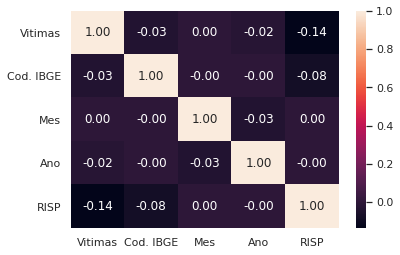

In [25]:
# Aqui mostramos a matriz de correlação  entre um par de variáveis numéricas 

sns.heatmap(df3.corr(), annot=True, fmt=".2f")
plt.show()

### **DATASET 3 - PRIMEIRO GRAFICO**

Neste gráfico vamos ver a evolução do registro de ocorrências, por mês, ao longo dos anos das vítimas de homicídio consumado. 

Logo abaixo podemos ver a quantidade de ocorrências registradas por ano. 

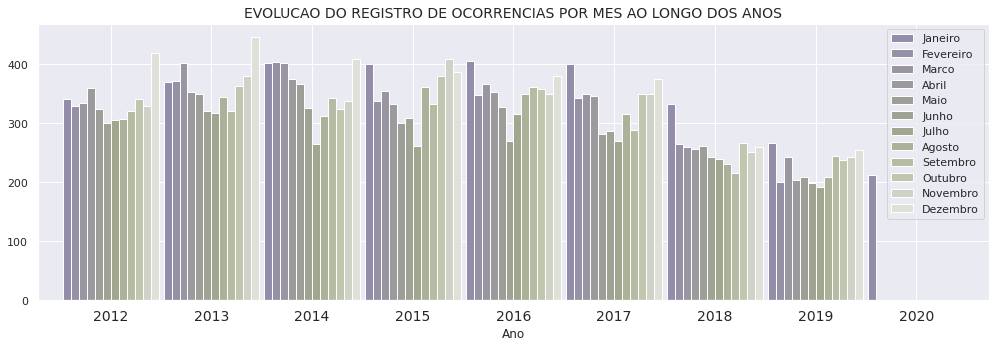

In [33]:
color = ['#948da9','#9691a5','#9996a1','#9b9a9c','#9d9e98','#9ea393',
         '#a0a78f','#abb299','#b5bca4','#c0c7ae','#cfd2c6','#dfe1d8']

ax = df3.groupby([ "Ano","Mes" ])["Vitimas"].sum().unstack().plot(kind='bar', figsize = (14,5), width = 0.95, color = color)


plt.legend(['Janeiro', 'Fevereiro','Marco','Abril','Maio','Junho','Julho', 
            'Agosto','Setembro','Outubro','Novembro','Dezembro'], loc='upper right')

plt.xticks(rotation=0, ha="center" , fontsize = 14)

plt.title("EVOLUCAO DO REGISTRO DE OCORRENCIAS POR MES AO LONGO DOS ANOS", fontsize =14);


plt.tight_layout();

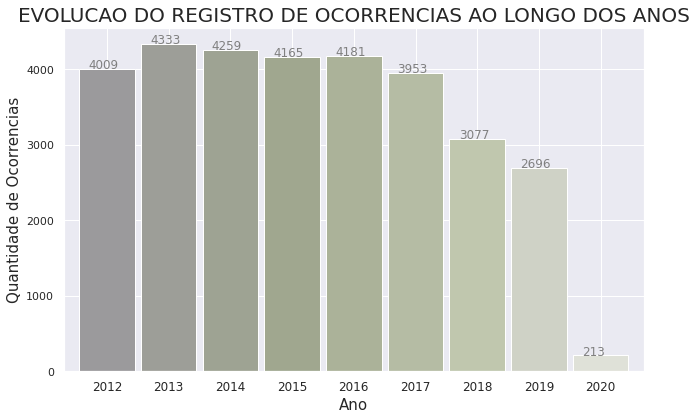

In [34]:
# Gerar um grafico exibindo parte correspondente para cada ano de registro

color = ['#9b9a9c','#9d9e98','#9ea393','#a0a78f','#abb299','#b5bca4','#c0c7ae','#cfd2c6','#dfe1d8']

ax = df3.groupby(["Ano"])["Vitimas"].sum().plot(kind='bar', figsize = (10,6),width = 0.9,color = color )
ax.set_alpha(0.8)

# set individual valores da barra 
for i in ax.patches:
    # get_x puxa p/ esquerda ou direita; get_height manda pra cima ou baixo
    ax.text(i.get_x()+.150, i.get_height()+1, \
            str(round((i.get_height()), 2)), fontsize=12, color='grey',
                rotation=0)

plt.xticks(rotation=0, ha="center" , fontsize = 12)
plt.ylabel("Quantidade de Ocorrencias", fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
plt.title("EVOLUCAO DO REGISTRO DE OCORRENCIAS AO LONGO DOS ANOS", fontsize = 20);
plt.tight_layout(); 


Observamos aqui que assim como nos outros dois datasets apresentados, este também mostra a tendência na diminuição dos casos, nos últimos anos.

### **DATASET 3 - SEGUNDO GRÁFICO**


Mais uma vez veremos o percentual  de registros que cada RISP (Região Integrada de Segurança Pública) e responsável por atender. 

Vou mostrar como foi gerado e o resultado.


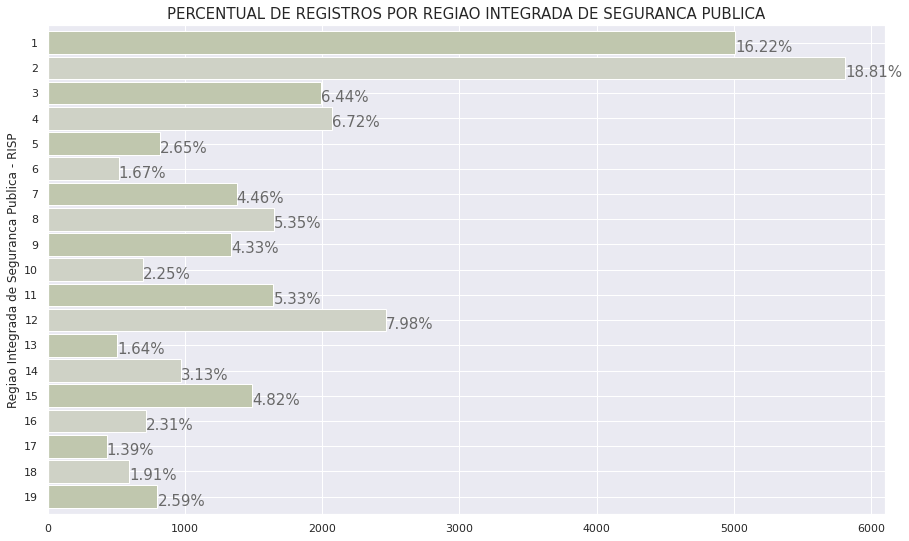

In [35]:
color = ['#c0c7ae','#cfd2c6']
ax = df3.groupby(["RISP"])["Vitimas"].sum().plot( kind = 'barh', figsize=(15,9), width= 0.9,fontsize=11,color = color);
#plt.xticks(rotation=0, ha="right")
plt.ylabel("Regiao Integrada de Seguranca Publica - RISP")
plt.title("PERCENTUAL DE REGISTROS POR REGIAO INTEGRADA DE SEGURANCA PUBLICA", FONTSIZE = 15);
# cria uma lista para coletar o plt.patches data
totals = []
# procurar os valores e adicionar a lista
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
# seta individual valores da barra usando valores da lista acima
for i in ax.patches:
    # get_x puxa p/ esquerda ou direita; get_height manda pra cima ou baixo
    ax.text(i.get_width()+.3, i.get_y()+.80, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')
# inverte o eixo y
ax.invert_yaxis()

Aqui vemos qua primeira e segunda RISP (B.H e RMBH) são responsáveis por cerca de 35% ( trinta e cinco por cento) das vítimas de homicídio consumado.

Sem levar em consideração BH e RMBH, a RISP com maior casos de homicídio consumado é  a décima segunda.


**Quais são as cidades que compõe a décima segunda RISP?**

In [0]:
cidades = df3.Municipio[df3["RISP"] == 12].unique()


In [37]:
cidades

array(['ABRE-CAMPO', 'ACAIACA', 'ACUCENA', 'ALTO CAPARAO',
       'ALTO JEQUITIBA', 'ALVINOPOLIS', 'AMPARO DO SERRA', 'ANTONIO DIAS',
       'BARAO DE COCAIS', 'BARRA LONGA', 'BELA VISTA DE MINAS',
       'BELO ORIENTE', 'BOM JESUS DO AMPARO', 'BOM JESUS DO GALHO',
       'BRAUNAS', 'BUGRE', 'CAIANA', 'CAPARAO', 'CAPUTIRA', 'CARATINGA',
       'CARMESIA', 'CATAS ALTAS', 'CHALE', 'CONCEICAO DE IPANEMA',
       'CORONEL FABRICIANO', 'CORREGO NOVO', 'DIONISIO', 'DOM CAVATI',
       'DOM SILVERIO', 'DURANDE', 'ENTRE-FOLHAS', 'ESPERA FELIZ',
       'FERROS', 'GUARACIABA', 'IAPU', 'IMBE DE MINAS', 'INHAPIM',
       'IPABA', 'IPANEMA', 'IPATINGA', 'ITABIRA', 'ITAMBE DO MATO DENTRO',
       'JAGUARACU', 'JEQUERI', 'JOANESIA', 'JOAO MONLEVADE', 'LAJINHA',
       'LUISBURGO', 'MANHUACU', 'MANHUMIRIM', 'MARLIERIA',
       'MARTINS SOARES', 'MATIPO', 'MESQUITA', 'MUTUM', 'NAQUE',
       'NOVA ERA', 'ORATORIOS', 'PASSABEM', 'PEDRA BONITA',
       'PIEDADE DE CARATINGA', 'PIEDADE DE PONTE NOVA', "PI

### **DATASET 3 - TERCEIRO GRÁFICO**

O dataset não considera Belo Horizonte como parte da região metropolitana

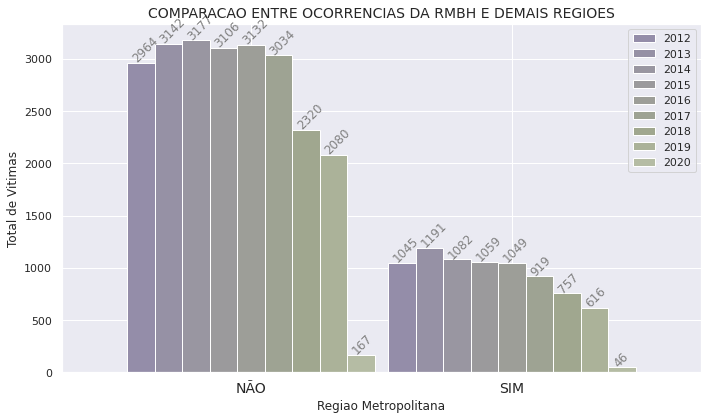

In [38]:
# Comparacao da quantidade de vitimas entre a RMBH e demais Regioes
color = ['#948da9','#9691a5','#9996a1','#9b9a9c','#9d9e98','#9ea393',
         '#a0a78f','#abb299','#b5bca4','#c0c7ae','#cfd2c6','#dfe1d8']

ax = df3.groupby(["RMBH","Ano"])["Vitimas"].aggregate('sum').unstack().plot(kind='bar', figsize = (10,6), width = 0.95, color = color)

# set individual valores da barra 
for i in ax.patches:
    # get_x puxa p/ esquerda ou direita; get_height manda pra cima ou baixo
    ax.text(i.get_x()+.01, i.get_height()+10, \
            str(round((i.get_height()), 2)), fontsize=12, color='grey',
                rotation=45)

plt.legend(loc='upper right')
plt.xlabel("Regiao Metropolitana")
plt.ylabel("Total de Vitimas")
plt.xticks(rotation=0, ha="center" , fontsize = 14)
plt.title("COMPARACAO ENTRE OCORRENCIAS DA RMBH E DEMAIS REGIOES", fontsize =14);

plt.tight_layout();


# **CONCLUSÃO**

Esta foi uma análise superficial na área de segurança pública do estado de Minas Gerais, onde os casos analisados são registros da área policial. 

Vale lembrar que a Polícia Militar de Minas Gerais, dentre todas as Polícias do Brasil, e a instituição mais antiga com 244 anos de existência.

A mesma tem mostrado seu valor no que tange a diminuição de ocorrências em todas as áreas aqui analisadas. 